<a href="https://colab.research.google.com/github/SantoshMahara/Decision_Tree_HeartProject/blob/main/Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [7]:
#a.	Extract the 5th column & store it in ‘customer_5’
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [10]:
customer_1=df['Dependents']

In [14]:
#b.	Extract the 15th column & store it in ‘customer_15’
customer_15=df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.loc[:,'StreamingMovies']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [17]:
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [30]:
#c.	Extract all the male senior citizens whose Payment Method is Electronic check & store the
# result in ‘senior_male_electronic’

senior_male_electronic=df[(df['gender']=='Male') &(df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]

In [31]:
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [32]:
customer_Total_tenure=df[(df['tenure']>70)| (df['MonthlyCharges']>100)]

In [33]:
customer_Total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


e.	Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
f.	Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’


In [34]:
two_mail_yes=df[(df["Contract"]== "Two year") & (df['PaymentMethod']=="Mailed check") &(df['Churn']=="cuYes")]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [35]:
customer_333=df.sample(n=333)

In [36]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
2305,4947-DSMXK,Male,0,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),97.70,3410,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
2557,4061-UKJWL,Male,0,No,No,3,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,45.45,141.7,No
1218,7979-CORPM,Male,0,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.55,2282.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,6933-FHBZC,Female,0,No,No,26,Yes,No,DSL,No,...,Yes,No,No,No,One year,Yes,Mailed check,56.05,1553.2,No
5431,5995-WWKKG,Female,0,No,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.80,695.05,No
4616,4338-EYCER,Male,0,Yes,No,21,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),54.60,1125.2,No
4010,3727-JEZTU,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,No


g.	Get the count of different levels from the ‘Churn’ column

In [37]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

B)	Data Visualization:

a.	Build a bar-plot for the ’InternetService’ column:
i.	Set x-axis label to ‘Categories of Internet Service’

ii.	Set y-axis label to ‘Count of Categories’

iii.	Set the title of plot to be ‘Distribution of Internet Service’

iv.	Set the color of the bars to be ‘orange’


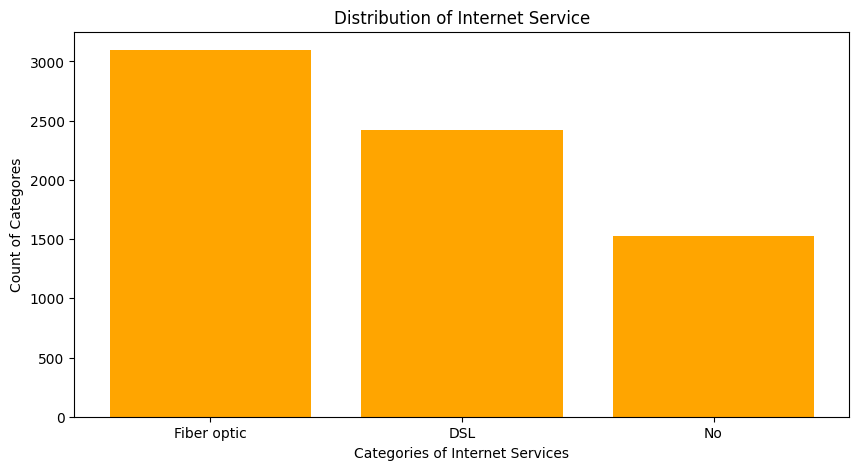

In [44]:
plt.figure(figsize=(10,5))
x = df['InternetService'].value_counts().keys()
y = df['InternetService'].value_counts()
plt.bar(x, y, color='orange')
plt.xlabel('Categories of Internet Services')
plt.ylabel('Count of Categores')
plt.title('Distribution of Internet Service')
plt.show()

b.	Build a histogram for the ‘tenure’ column:

i.	Set the number of bins to be 30

ii.	Set the color of the bins  to be ‘green’

iii.	Assign the title ‘Distribution of tenure’


<Axes: >

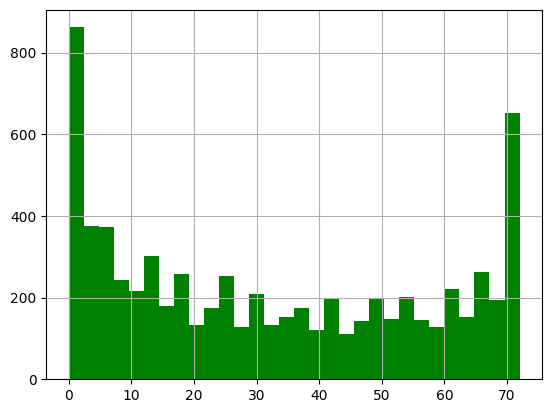

In [45]:
#df['tenure'].hist()
df['tenure'].hist(bins=30,color='green')


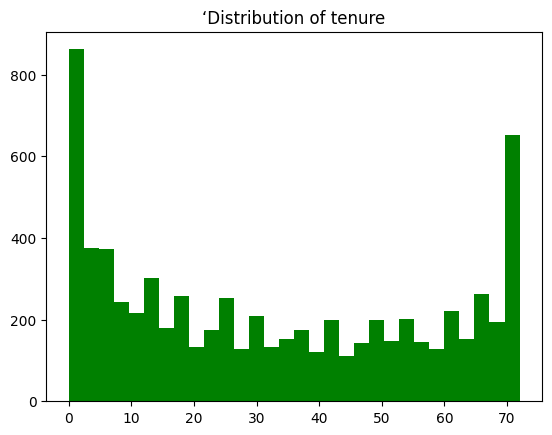

In [46]:
plt.hist(df['tenure'], bins=30, color='green')
plt.title("‘Distribution of tenure")
plt.show()

Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map - ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

Assign the points a color of ‘brown’

Set the x-axis label to ‘Tenure of customer’

Set the y-axis label to ‘Monthly Charges of customer’

Set the title to ‘Tenure vs Monthly Charges’

Build a box-plot between ‘tenure’ &

‘Contract’. Map ‘tenure’ on the y-axis &
‘Contract’ on the x-axis.


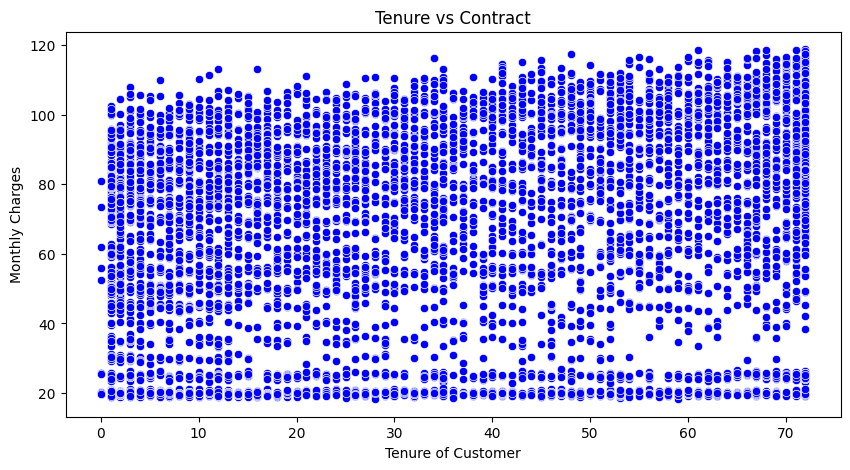

In [47]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='tenure',y='MonthlyCharges', data=df,color='blue')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Contract')
plt.show()

d.	Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

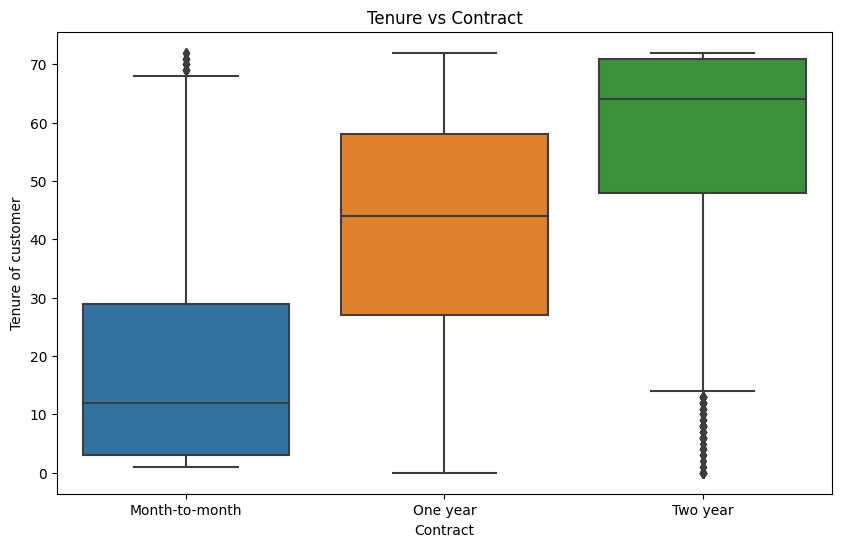

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.xlabel('Contract')
plt.ylabel('Tenure of customer')
plt.title('Tenure vs Contract')
plt.show()

##ML

Linear Regression:

Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

Divide the dataset into train and test sets in 70:30 ratio.

Build the model on train set and predict the values on test set

After predicting the values, find the root mean square error

Find out the error in prediction & store the result in ‘error’

Find the root mean square error
